# Neural Network for MNIST Data Set

#### Classify 10 Different Numbers without TensorFlow
In this NoteBook we will create a nerual network that can classify HandWriten Images in 10 different categories, first we will start by importing the libraries for using MNIST

MNIST is a Data set that is udes specifically for people that start right now with Machine Learning and Neural Network and want to build something without having to worry about data sets regularization of the data and in general the input of the algorithm

This dataset will provide 6000 images all of them with size $[28,28]$ 

## Importing the MNIST DataSet

In [70]:
import mnist
import scipy.misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

The next step is to use *mnist* in order to save in different variables the images and labels of the training and test sets.

In [71]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

It is really important to transform every image into a vector with $28*28 = 784$ features, this enable as to use this images - pixels as idividuals features that will be used as input in the Nueral Network

In [72]:
print(train_images.shape)
num_Imag = train_images.shape[0]
nH = train_images.shape[1]
nW = train_images.shape[2]
Tr_Im = train_images.reshape((num_Imag,nH*nW))
Tr_lab = train_labels
Tr_Im = Tr_Im/255
print(Tr_Im.shape)
m=num_Imag # This is the number of input images

(60000, 28, 28)
(60000, 784)


## We need to Change Y ( train_labels) from Hot-Vector to Binary representation 

Example of a Hot Vector:
$$Y = [0,2,1,3]$$
Example of the Binary representation
$$ Y = 
\begin{bmatrix}
    1&0&0&0\\
    0&0&1&0\\
    0&1&0&0\\
    0&0&0&1\\
  \end{bmatrix} $$

In [73]:
def HotVector(targets,n_labels):
    Ytr = np.zeros((targets.shape[0], n_labels)) #empty one-hot matrix
    Ytr[np.arange(targets.shape[0]), targets] = 1 #set target idx to 1

    Ytr=np.transpose(Ytr)

    print(Ytr[:,0:5]) # We will show only the first 5 results

    print(Ytr.shape)
    return Ytr

In [74]:
n_labels = 10 # How many labels we have (10 different numbers)


targets = train_labels
print(targets[0:5]) # We will show only the first 5 results
print(targets.shape)
Ytr = HotVector(targets,n_labels)
Ytr=Ytr.T
print(Ytr.shape)

[5 0 4 1 9]
(60000,)
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
(10, 60000)
(60000, 10)


# TensorFlow

TensorFlow is a Framework that let you build a Neural Network really fast and efficiently. Essential you only have to develop the Forward Propagation and the rest will be taken care of by the Framework.

First of all, TensorFlow have Variables and **placeholders**, you will use placeholders in the input like X and Y. This is basically gives you the ability to initialize that there will be X which is the input but you will specialize the input later.

$$X = tf.placeholder(tf.float32, [None, 784])$$

This means that you will feed this Neural Network with a matrix that has dimensions $[Anything,784]$, so in the first dimension you will have any number but in the second one you need to have 784. This happens because you have the ability to feed the Neural Network with as many pictures as you want, but the pixels of this images need to be 784.

The **Variable** is mainly used by the Weights and Biases, when something is denoted by Variable it means that they have an initial value but this value is changing while the ANN is learning.

$$W = tf.Variable(tf.zeros([784, 10]))$$

In the Variable you need to specialize the dimenisons and in this particular one you will going to have $[784,10]$ which is 784 nodes and then 10 nodes.

Finally it is really important to initialize this variables, and you can do this with this command line.

$$init = tf.global_variables_initializer()$$

In [75]:
import tensorflow as tf

X = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

init = tf.global_variables_initializer()

# Model of the Neural Netowrk

Now that you have initialize the Variables and Placeholders of the Neural Network you need to specify the model that will be used. In this particular notebook we will use the simplest possible neural network 


$$Z = X*W + b$$

\begin{equation*}
Z = 
  \begin{bmatrix}
    2&100& \dotsc & 32\\
    23&43& \dotsc & 20\\
    122&23& \dotsc & 61\\
    244&44& \dotsc & 22\\
    \vdots & \vdots  & \vdots &  \vdots \\
    112&20& \dotsc & 1 \\
  \end{bmatrix}
  \begin{bmatrix}
    w_{00} & w_{10} & w_{20} & w_{30} & \dotsc & w_{m0} \\
    w_{01}& w_{11} & w_{21} & w_{31} & \dotsc & w_{m1}\\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    w_{0n} & w_{1n} & w_{2n} & w_{3n} & \dotsc & w_{mn} \\
  \end{bmatrix}
  +
  \begin{bmatrix}
    b_{0} &
    b_{1} &
    \dotsc &
    b_{n} 
  \end{bmatrix}
\end{equation*}


<br><center> $ [60000,10] = [60000,784]*[784,10] + [1,10] $ </center></br>

# Forward Propagation with SoftMax Funciton

And then will be used the SoftMax Function,
$$A = \frac{e^{Z}}{\sum_{n=1}^{N}{e^{Z_n}}}$$

# How this is Translated to TensorFlow

In order to create our model we need to use the functions of TensorFlow for everything, for example the multiplication of two arays is implemented with the funciton $tf.matmul()$ and the add of two arrays-tensors is implemented with this funciton $tf.add()$.

So if we want to multiply two arrays and then ad the result with a new one $Z = X*W + b$, we need to use the above function with this order

$$tf.add(tf.matmul(X, W),b)$$

Finally we need to use the SoftMax fucntion so we need to use in the result this funciton $tf.nn.softmax()$.

In [76]:
# model
Y = tf.nn.softmax(tf.add(tf.matmul(X, W),b))
# placeholder for correct labels
Y_ = tf.placeholder(tf.float32, [None, 10])

# Cross Entropy 

Again we need to right the function of Cross Entropy into TensorFlow Code, first we will start with the classical function of Cost 

$$C = - \sum_{k=1}^{m}Y^{real}*log(Y)$$ 

First we need to create the multiplication with the $log$

$$Y^{real}*tf.log(Y)$$ 

Then we need to sum all this points and find the mean value of them so we will use the $tf.reduce sum()$ and $tf.reduce mean()$

In [77]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y_ * tf.log(Y)))

# Optimization - BackPropagation

As we already mention in tensorflow you only need to take care of the forward propagation and cost function, everything elese will be taken care for you, this means that the only think that we need to do from now on is to specify how exactly the optimization will happen, so how exactly the weights will be updated-improved

In [78]:
optimizer = tf.train.GradientDescentOptimizer(0.0003)
train_step = optimizer.minimize(cross_entropy)

# Train the Model - Improve the Weights and Biasis

At this point we need to Train the model and more specifically start the Session in order for the model to start training itself. So the first step is to right the command line 

$$sess = tf.Session()$$

And from now on $sess$ the variable that rund the neural network.

It is really important to initialize the variable again here just by writing $sess.run(init)$ and as you can see we use the init which is the name with the initalization of the varables.

Then of course we need a for loop and here we make 1000 loops, this means that the neural network will improve itself 1000 time with differnt intput data every time.

Finally you need to use the command line $sess.run()$ again but this time you will run it with the $train_step$ which is the optimization of the ANN and the input data of course the images and the labels

$$sess.run(trainStep, feedDict=trainData)$$

In [79]:
sess = tf.Session()
sess.run(init)

Batch=300
point=0
for i in range(1000):
    
    train_data={X: Tr_Im[point:point+Batch,:], Y_:Ytr[point:point+Batch,:]} # Store the training data

    # ============ Show the Cost in every loop ===============
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y_ * tf.log(Y)))
    [_,cross_entropy] = sess.run([train_step,cross_entropy],feed_dict=train_data)
    print(cross_entropy)
    # ============ Show the Cost in every loop ===============
    
    
    #sess.run(train_step, feed_dict=train_data) # Just make the culculations
    
    
    point = point+Batch # Use the new Batch of Images
    if (point>60000):
        point=0

690.77496
661.99756
638.4052
616.6336
591.23047
565.2551
539.9378
519.2126
503.20352
483.12067
487.92548
466.3634
441.57397
438.34857
425.66394
399.24072
402.1453
380.39307


KeyboardInterrupt: 

## Find the Accuracy of the model 

First we need to find to find for every image if she had a correct prediction or not. This means that we will create a boolean array with False and True depending on if the result was correct or not.

This can be done with two functions the first one is $tf.argmax()$ which culculates the position of the bigest number in the array $Y$. For this array Y:

\begin{equation*}
Y =
  \begin{bmatrix}
    0.2 &
    0.3 &
    0.05 &
    \dotsc &
    0.001 
  \end{bmatrix}
\end{equation*}

The result will be $1$, because the Neural Network predicts that the picture has 0.3 propability to be the number 1 and this propability is the bigest one.

Then the funciton $tf.equal$ will be used in order to cuclulate if the real labels and the created ones from the neural network are the same.

Now we need to enumarate this array, but in order to do that we need to change it from boolean to numbers 1 and 0. This can be done with the funciton $tf.cast()$ with the dataType $Float$.

Finally we need to find how many images are correct VS how many images are wrong and for this specific table that hs only ones and zeros is the same to do the average of this aray. So we can use the function $tf.reduceMean$ 

In [83]:
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

print (sess.run(accuracy, feed_dict={X: Tr_Im[400:500,:], Y_:Ytr[400:500,:]}))

0.77


# Actual Results and Testing

First we need to get the predected values of Y for every single of the 60000 Images. For that reason we will run our nural network with the whole data set and Y as atribute in order to get Y as a result 

$$Ytt = sess.run(Y, feedDict={X: Tr_Im, Y_:Ytr})$$

Then we will just show the result for different idexes or even better for different images

[0.56491184 0.00325196 0.0193298  0.08850715 0.01268202 0.16916648
 0.0334553  0.02155158 0.06596231 0.02118145]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
0


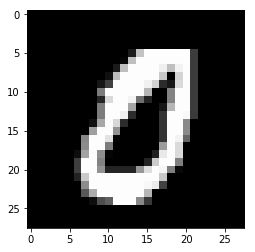

In [57]:
Ytt = sess.run(Y, feed_dict={X: Tr_Im, Y_:Ytr})


idx=81
print(Ytt[idx,:])
#print(sum(Ytt[idx,:])) # Because A2 is the propability to be something and the sumation of this propabilities is equal to 1
print(Ytr[idx,:])

print(np.argmax(Ytt[idx,:]))
print(np.argmax(Ytr[idx,:]))
imgplot = plt.imshow(train_images[idx,:,:], cmap = 'gray')
plt.show()